<a href="https://colab.research.google.com/github/bhavanajayasimha/student-project-2025/blob/main/persosonalised%20medicine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Patient_ID  Age  Gender Physical_Activity_Level   Diet_Type Blood_Pressure  \
0           1   55    Male          Lightly Active  Vegetarian         129/70   
1           2   33    Male               Sedentary  Vegetarian         106/64   
2           3   62  Female          Lightly Active        Keto         103/80   
3           4   65    Male          Lightly Active  Vegetarian         121/69   
4           5   19    Male       Moderately Active       Vegan         103/61   

   Cholesterol  Glucose_Level Diabetes_Risk  \
0        201.9           88.6           Low   
1        202.8           91.0           Low   
2        207.4           86.2      Moderate   
3        179.6           85.2           Low   
4        181.1           80.9           Low   

                          Diet_Recommendation  \
0     Mediterranean, reduce sat fat & sodium.   
1                   Balanced whole-food diet.   
2  Calorie deficit, fiber boost, limit sugar.   
3                   Balanced whole

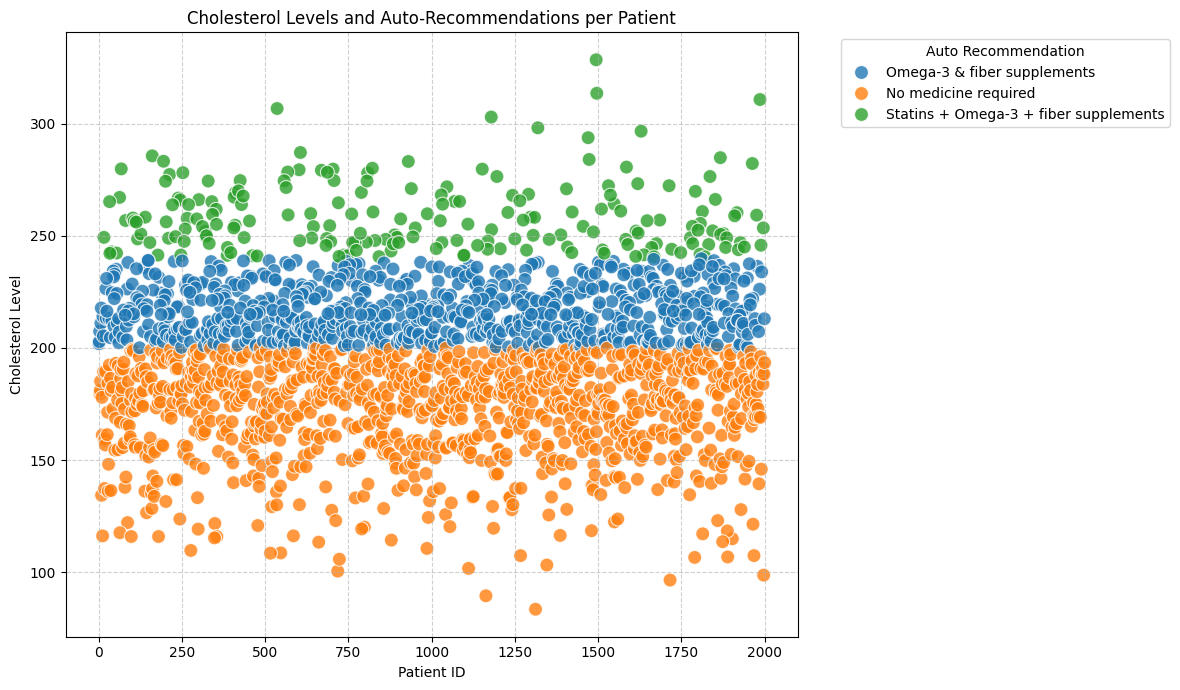

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("/content/medicine dataset.xlsx")
print(df.head())

high_chol = df[df['Patient condition'].str.contains("Cholesterol", case=False, na=False)]
print(high_chol)

def get_medicine(patient_id):
    record = df[df['Patient_ID'] == patient_id]
    if record.empty:
        return "No patient found."
    return record[['Patient condition', 'Medicine recommendation']]


print(get_medicine(3))

def recommend_from_cholesterol(value):
    if value > 240:
        return "Statins + Omega-3 + fiber supplements"
    elif 200 < value <= 240:
        return "Omega-3 & fiber supplements"
    else:
        return "No medicine required"

df['Auto_Recommendation'] = df['Cholesterol'].apply(recommend_from_cholesterol)
print(df[['Patient_ID','Cholesterol','Auto_Recommendation']])

plt.figure(figsize=(12, 7))
sns.scatterplot(data=df, x='Patient_ID', y='Cholesterol', hue='Auto_Recommendation', s=100, alpha=0.8)
plt.title('Cholesterol Levels and Auto-Recommendations per Patient')
plt.xlabel('Patient ID')
plt.ylabel('Cholesterol Level')
plt.grid(True, linestyle='--', alpha=0.6)
plt.ylabel('Cholesterol Level')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Auto Recommendation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()